In [1]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
def ClassLabel(i):
    if i == 0:
        return 'person'
    elif i == 1:
        return 'dog'
    elif i == 2:
        return 'airplane'
    elif i == 3:
        return 'cat'
    elif i == 4:
        return 'flower'
    elif i == 5:
        return 'car'
    elif i == 6:
        return 'fruit'
    elif i == 7:
        return 'motorbike'

In [3]:
X = []
Y = []


for i in range(1,3993):
    img = Image.open('All/'+str(i)+'.jpg')
    data = np.asarray( img, dtype="int32" ) / 255
    
    X.append(data)

    if i < 500:
        Y.append(0) #person

    elif i >= 500 and i < 999:
        Y.append(1) #dog

    elif i >= 999 and i < 1498:
        Y.append(2) #airplane

    elif i >= 1498 and i < 1997:
        Y.append(3) #cat

    elif i >= 1997 and i < 2496:
        Y.append(4) #flower

    elif i >= 2496 and i < 2995:
        Y.append(5) #car

    elif i >= 2995 and i < 3494:
        Y.append(6) #fruit

    elif i >= 3494:
        Y.append(7) #motorbike

In [4]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
X_train_original = np.asarray(X_train_original)
X_test_original = np.asarray(X_test_original)

label_encoder = LabelEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
encoder = load_model('encoder.h5')

Instructions for updating:
Colocations handled automatically by placer.


/home/caio/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
X_train_encoded = encoder.predict(X_train_original)
X_test_encoded = encoder.predict(X_test_original)

In [8]:
input_img = Input(shape=(32,32,3,))
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(2, (3, 3), activation='relu', padding='same')(pool2)

dense1 = Flatten()(conv3)
dense2 = Dense(64)(dense1)
dense3 = Dense(16)(dense2)

preds = Dense(8, activation='sigmoid', name='final')(dense3)

Classificador_encoded = Model(input_img,preds)

Classificador_encoded.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
Classificador_encoded.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 2)           74        
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [10]:
h = Classificador_encoded.fit(X_train_encoded, y_train,
                epochs=20,
                batch_size=64,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3193/3193 [==============================] - 3s 875us/step - loss: 1.9418 - acc: 0.2490
Epoch 2/20
3193/3193 [==============================] - 2s 517us/step - loss: 1.6513 - acc: 0.4093
Epoch 3/20
3193/3193 [==============================] - 2s 524us/step - loss: 1.3817 - acc: 0.5258
Epoch 4/20
3193/3193 [==============================] - 2s 520us/step - loss: 1.1510 - acc: 0.6051
Epoch 5/20
3193/3193 [==============================] - 2s 522us/step - loss: 1.0259 - acc: 0.6373
Epoch 6/20
3193/3193 [==============================] - 2s 521us/step - loss: 0.9434 - acc: 0.6693
Epoch 7/20
3193/3193 [==============================] - 2s 519us/step - loss: 0.8581 - acc: 0.6887
Epoch 8/20
3193/3193 [==============================] - 2s 523us/step - loss: 0.8091 - acc: 0.7153
Epoch 9/20
3193/3193 [==============================] - 2s 521us/step - loss: 0.7656 - acc: 0.7275
Epoch 10/20
3193/3193 [==============================] - 2s 5

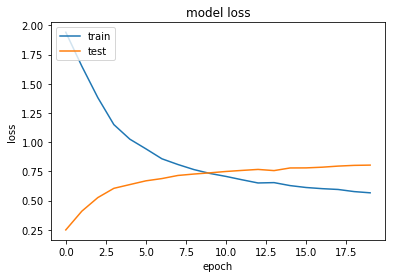

In [11]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
Classificador_encoded.evaluate(X_test_encoded,y_test)

799/799 [==============================] - 0s 412us/step


[0.8074391091123541, 0.7033792231348489]

In [13]:
X_predicted = Classificador_encoded.predict(X_test_encoded)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane


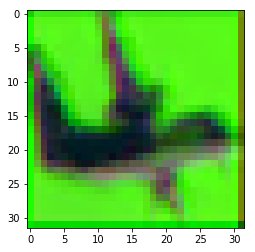

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


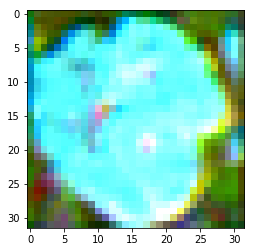

car


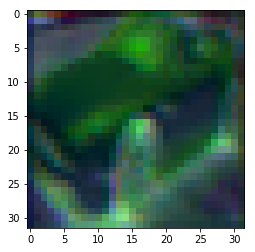

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


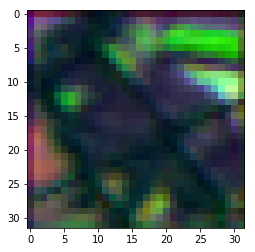

flower


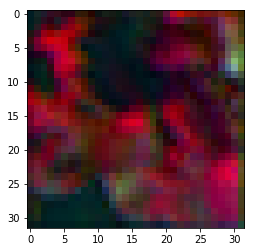

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person


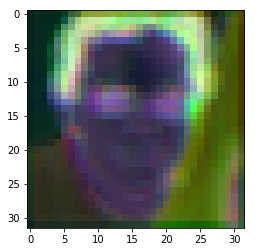

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


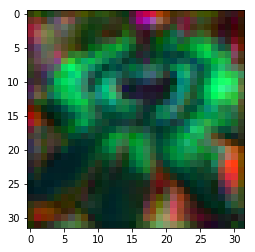

dog


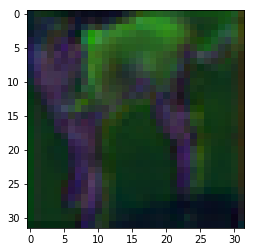

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


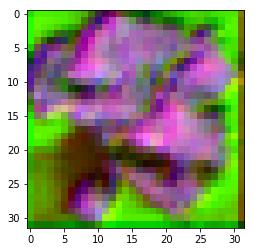

airplane


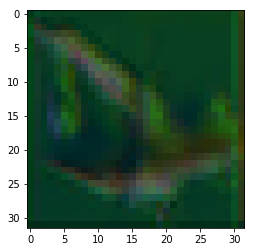

fruit


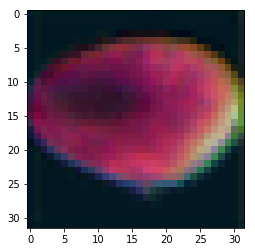

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fruit


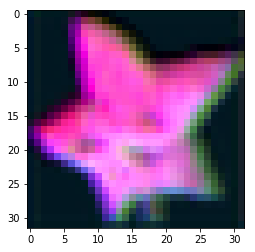

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


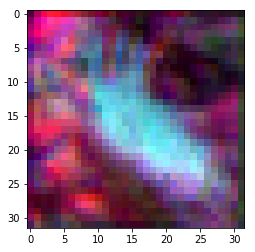

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


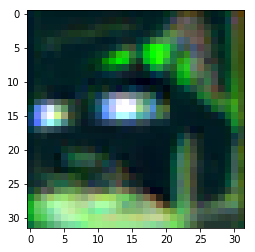

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane


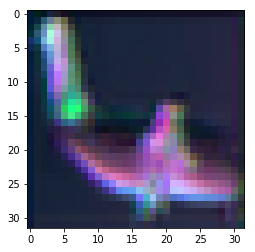

person


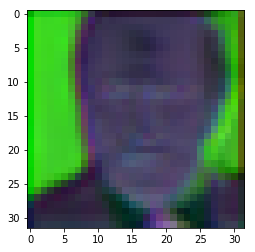

flower


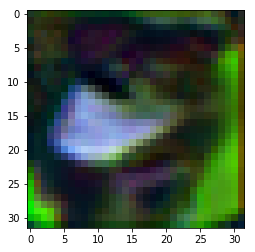

flower


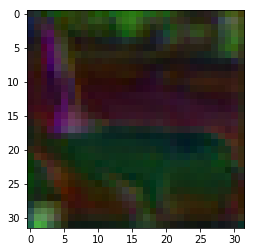

dog


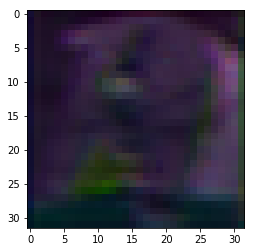

airplane


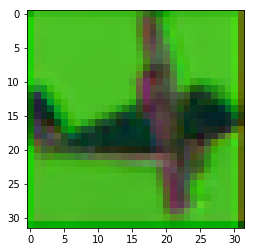

motorbike


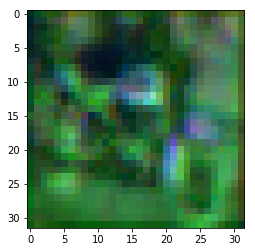

airplane


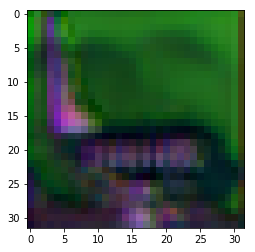

airplane


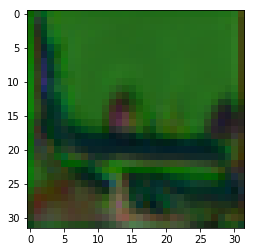

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane


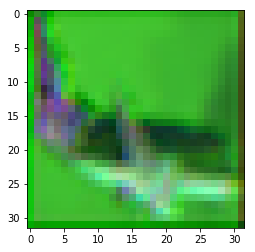

airplane


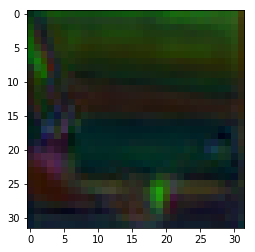

fruit


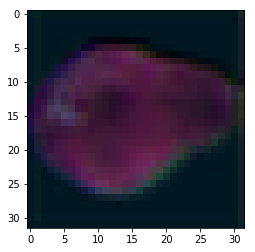

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


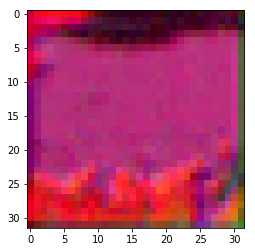

fruit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


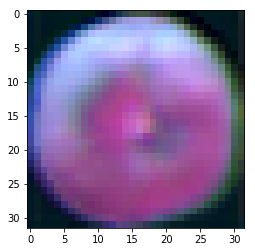

dog


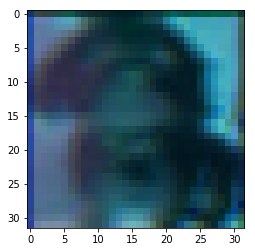

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


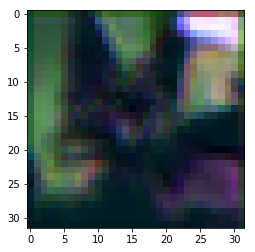

In [14]:
for i in range(30):
    #Original
    print(ClassLabel(np.argmax(X_predicted[i])))
    f = X_test_encoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
#     #encoded
#     f = np.reshape(Xtr[i],(32,32,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()
#     #autoencoded
#     f = np.reshape(X_auto[i],(128,128,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()